In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("stroke_classification.xlsx")
df.head()
df= df.drop(['pat_id'], axis = 1 )
df.head()


,stroke,gender,age,hypertension,heart_disease,work_related_stress,urban_residence,avg_glucose_level,bmi,smokes
0,1,Male,67.0,0,1,0,1,228.69,36.6,1
1,1,Female,61.0,0,0,1,0,202.21,NaN,0
2,1,Male,80.0,0,1,0,0,105.92,32.5,0
3,1,Female,49.0,0,0,0,1,171.23,34.4,1
4,1,Female,79.0,1,0,1,0,174.12,24.0,0


In [3]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, explorative= True)
# profile.to_file("Stroke.html")

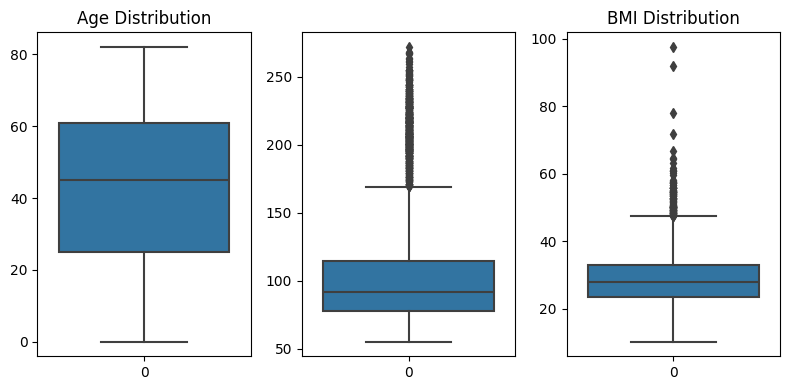

In [4]:
fig,axs = plt.subplots(1,3, figsize = (8,4))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['avg_glucose_level'], ax = axs[1])
plt3 = sns.boxplot(df['bmi'], ax = axs[2])
plt1.set_title('Age Distribution')
plt1.set_title('Age Distribution')
plt3.set_title('BMI Distribution')
plt.tight_layout()

In [5]:
y = df['stroke']
x = df.drop(['stroke'], axis= 1 )
# gender_map = {
#     'Male': 1,
#     'Female': 0
# }
# x['gender'] = x['gender'].map(gender_map)
x.head()
count_ones = len(y[y == 1])
print(count_ones)

249


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [7]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models = clf.fit(x_train,x_test,y_train,y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.57it/s]

[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 NearestCentroid                    0.78               0.73     0.73      0.83   
 GaussianNB                         0.88               0.68     0.68      0.89   
 PassiveAggressiveClassifier        0.83               0.60     0.60      0.86   
 LGBMClassifier                     0.94               0.55     0.55      0.92   
 DecisionTreeClassifier             0.91               0.55     0.55      0.90   
 XGBClassifier                      0.94               0.54     0.54      0.92   
 BaggingClassifier                  0.94               0.52     0.52      0.92   
 LinearDiscriminantAnalysis         0.94               0.52     0.52      0.91   
 LabelSpreading                     0.92               0.52     0.52      0.91   
 LabelPropagation                   0.92               0.52     0.52      0.91   
 BernoulliNB    

In [8]:
#Pipleline
#Boolean variables: Use ordinal encoder 
from sklearn.pipeline import Pipeline

num_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

gender_values = ['Male', 'Female']

ord_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1 ,  categories=[gender_values]))
])


In [9]:
#ColumnTransform
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_feature', num_transform, ['age', 'avg_glucose_level', 'bmi']),
    ('ordinal_feature', ord_transform, ['gender'])
])

In [10]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', NearestCentroid())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('ordinal_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OrdinalEncoder(categories=[['Male',
                                                                                               'Female']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['gender'])])),
                ('model', NearestCentroid())])

In [11]:
y_predict = clf.predict(x_test)
for i, j in zip(y_predict, y_test):
    print(f'Predict value: {i} ---> Actual Value: {j}')


Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 1
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 1 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict value: 0 ---> Actual Value: 0
Predict valu

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.77      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022

